In [17]:
import sys
sys.path.insert(1, '../')

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from os import path

from deployment_instance import ExperimentResult
from src.ingest_data import ingest_experiment_results
from src.query_data import get_data_exfiltration_times, percent_of_data_exfiltrated

In [3]:
equifax_baseline_data = ingest_experiment_results(path.join('data', 'EquifaxBaseline_v2'))
equifax_greedy_baseline = ingest_experiment_results(path.join('data', 'Equifax_Greedy/Greedy_baseline'))
equifax_random_baseline = ingest_experiment_results(path.join('data', 'Equifax_Random/Random_baseline'))

# Equifax Baseline
d1_honeycred_0 = ingest_experiment_results(path.join('data/Equifax_honeycred_decoy_1', 'Equifax_honeycred_0'))
d1_honeycred_10 = ingest_experiment_results(path.join('data/Equifax_honeycred_decoy_1', 'Equifax_honeycred_10'))

# Equifax Greedy
greedy_d1_honeycred_0 = ingest_experiment_results('data/Equifax_Greedy/Greedy_d1_h0')
greedy_d1_honeycred_10 = ingest_experiment_results('data/Equifax_Greedy/Greedy_d3_h10')

# Equifax Random
random_d1_honeycred_0 = ingest_experiment_results('data/Equifax_Random/Random_d1_h0')
random_d1_honeycred_10 = ingest_experiment_results('data/Equifax_Random/Random_d1_h10')

In [4]:
baseline_exfiltration_times = get_data_exfiltration_times(equifax_baseline_data)
greedy_baseline_exfiltration_times = get_data_exfiltration_times(equifax_greedy_baseline)
random_baseline_exfiltration_times = get_data_exfiltration_times(equifax_random_baseline)

# Decoy 1
d1_honeycred_0_times = get_data_exfiltration_times(d1_honeycred_0)
d1_honeycred_10_times = get_data_exfiltration_times(d1_honeycred_10)

# Greedy
greedy_d1_honeycred_0_times = get_data_exfiltration_times(greedy_d1_honeycred_0)
greedy_d1_honeycred_10_times = get_data_exfiltration_times(greedy_d1_honeycred_10)

# Random
random_d1_honeycred_0_times = get_data_exfiltration_times(random_d1_honeycred_0)
random_d1_honeycred_10_times = get_data_exfiltration_times(random_d1_honeycred_10)

print(greedy_d1_honeycred_10_times)
print(random_d1_honeycred_10_times)

[20.075683808326723, 14.971542541186015, 15.890074197451273, 18.142973057428996, 15.300008487701415, 15.472008689244587, 12.623742600282034, 15.375209097067515, 15.206007707118989, 15.70011372566223]
[36.45201991001765, 35.924175918102264, 31.313576010862985, 30.95850907166799, 19.499130090077717, 19.594857895374297, 43.37513642311096, 16.062442382176716, 33.49301917950312, 47.356242247422536]


In [5]:
# Percent of experiments all data exfiltrated
baseline_exfiltration_percent = percent_of_data_exfiltrated(equifax_baseline_data)
equifax_greedy_percent = percent_of_data_exfiltrated(equifax_greedy_baseline)
equifax_random_percent = percent_of_data_exfiltrated(equifax_random_baseline)

honeycred_10_exfiltration_percent = percent_of_data_exfiltrated(d1_honeycred_10)

greedy_d1_honeycred_10_exfiltration_percent = percent_of_data_exfiltrated(greedy_d1_honeycred_10)

print(f'Baseline: {baseline_exfiltration_percent}')
print(f'Greedy: {equifax_greedy_percent}')
print(f'Random: {equifax_random_percent}')

print(f'HoneyCred 10 Deception: {honeycred_10_exfiltration_percent}')

print(f'Greedy HoneyCred 10 Deception: {greedy_d1_honeycred_10_exfiltration_percent}')

Baseline: 100.0
Greedy: 100.0
Random: 100.0
HoneyCred 10 Deception: 100.0
Greedy HoneyCred 10 Deception: 100.0


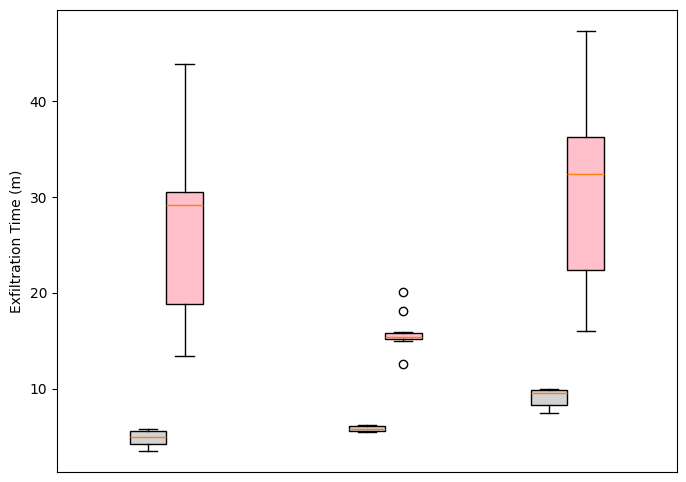

In [6]:
# Box plot comparing data exfiltration times
positions = [1.2, 1.4,
             2.4, 2.6,
             3.4, 3.6]

decoy_1_data = [d1_honeycred_0_times,
                d1_honeycred_10_times]

decoy_2_data = [greedy_d1_honeycred_0_times, 
                greedy_d1_honeycred_10_times]

random_data = [random_d1_honeycred_0_times,
                random_d1_honeycred_10_times]

all_data = decoy_1_data + decoy_2_data + random_data

plt.figure(figsize=(8, 6))
boxplot = plt.boxplot(all_data, patch_artist=True, widths=0.2, positions=positions)

plt.xticks([])
# hide xticks
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)

plt.ylabel('Exfiltration Time (m)')
plt.xlabel('')
plt.title('')


# fill with colors
colors = ['lightgrey', 'pink', 'lightgrey', 'pink', 'lightgrey', 'pink']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

plt.show()

Text(0.5, 1.0, 'CDF of data exfiltration times for Equifax attacker')

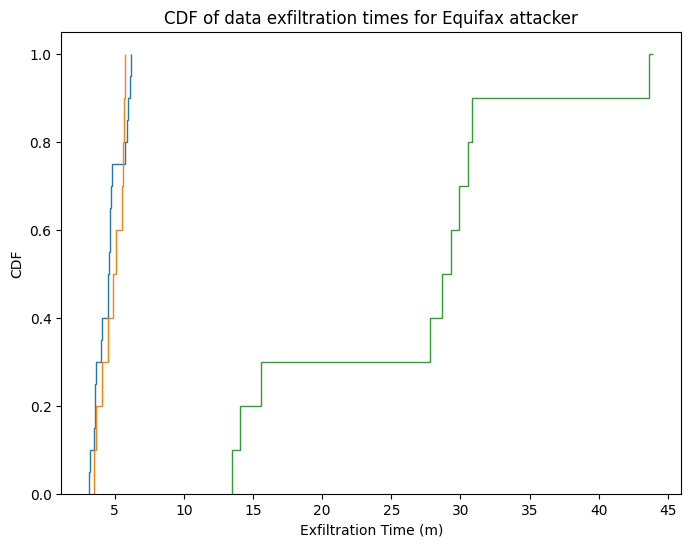

In [12]:
# Create smooth CDF of data exfiltration times
plt.figure(figsize=(8, 6))

_, _, patches = plt.hist(baseline_exfiltration_times, bins=100, cumulative=True, histtype='step', label='Baseline', density=True)
patches[0].set_xy(patches[0].get_xy()[:-1])

# plt.ecdf(baseline_exfiltration_times, label='HoneyCred 0')
# plt.ecdf(d1_honeycred_0_times, label='HoneyCred 10')
# plt.ecdf(d1_honeycred_10_times, label='HoneyCred 10')

# plt.ecdf(greedy_d1_honeycred_0_times, label='Greedy HoneyCred 0')
# plt.ecdf(greedy_d1_honeycred_10_times, label='Greedy HoneyCred 10')
_, _, patches = plt.hist(d1_honeycred_0_times, bins=100, cumulative=True, histtype='step', label='HoneyCred 0', density=True)
patches[0].set_xy(patches[0].get_xy()[:-1])

_, _, patches = plt.hist(d1_honeycred_10_times, bins=100, cumulative=True, histtype='step', label='HoneyCred 10', density=True)
patches[0].set_xy(patches[0].get_xy()[:-1])

plt.xlabel('Exfiltration Time (m)')
plt.ylabel('CDF')
plt.title('CDF of data exfiltration times for Equifax attacker')

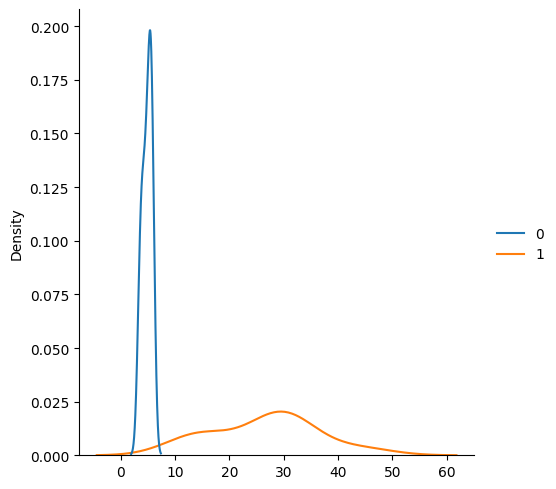

In [25]:
d1_honeycred_0_times_np = np.array(d1_honeycred_0_times)
d1_honeycred_10_times_np = np.array(d1_honeycred_10_times)

sns.displot(data=[d1_honeycred_0_times_np, d1_honeycred_10_times_np], kind='kde')

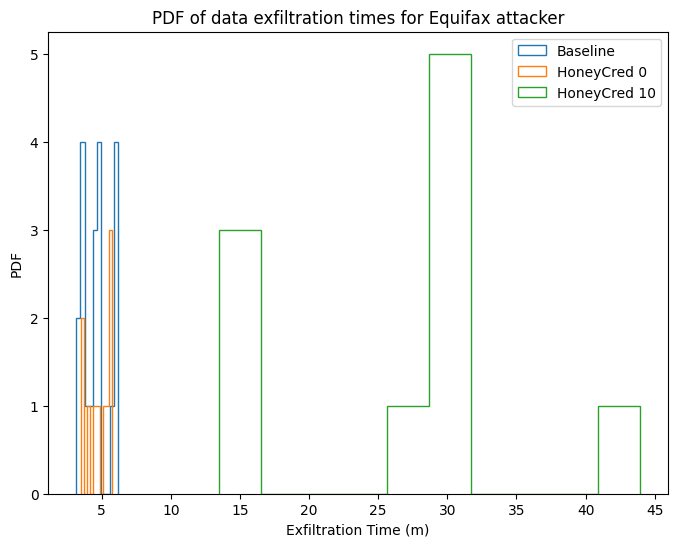

In [15]:
# plot pdf of data exfiltration times
plt.figure(figsize=(8, 6))
plt.hist(baseline_exfiltration_times, bins=10, histtype='step', label='Baseline')
plt.hist(d1_honeycred_0_times, bins=10, histtype='step', label='HoneyCred 0')
plt.hist(d1_honeycred_10_times, bins=10,histtype='step', label='HoneyCred 10')

# plt.hist(greedy_d1_honeycred_0_times, bins=100, density=True, histtype='step', label='Greedy HoneyCred 0')
# plt.hist(greedy_d1_honeycred_10_times, bins=100, density=True, histtype='step', label='Greedy HoneyCred 10')

plt.xlabel('Exfiltration Time (m)')
plt.ylabel('PDF')
plt.title('PDF of data exfiltration times for Equifax attacker')
plt.legend()
plt.show()

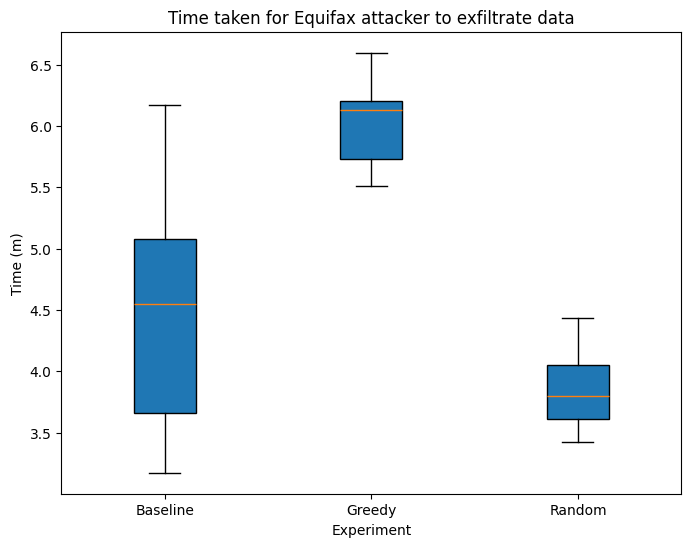

In [15]:
# Box and whisker plot of baseline vs greedy exfiltration times
plt.figure(figsize=(8, 6))
boxplot = plt.boxplot([baseline_exfiltration_times, greedy_baseline_exfiltration_times, random_baseline_exfiltration_times], patch_artist=True)

plt.xticks([1, 2, 3], ['Baseline', 'Greedy', 'Random'])

plt.ylabel('Time (m)')
plt.xlabel('Experiment')
plt.title('Time taken for Equifax attacker to exfiltrate data')

plt.show()
